## RPM 모델 구조 설계

In [4]:
import pandas as pd
import numpy as np

# Load the data
# 전체 columns : E_scr_pv ,E_scr_sv ,c_temp_pv ,c_temp_sv ,k_rpm_pv ,k_rpm_sv ,n_temp_pv ,n_temp_sv ,scale_pv ,s_temp_pv ,s_temp_sv

data = pd.read_csv('../JJW/DATA/oct_data.csv')
# 2 < scale_pv < 4
data = data[(data['scale_pv'] > 2) & (data['scale_pv'] < 4)]
data['scale_pv'] = 0
# 이전 행과의 차이값 입력, 첫 값은 0
data['c_temp_pv_dif'] = data['c_temp_pv'].diff().fillna(0)
data['s_temp_pv_dif'] = data['s_temp_pv'].diff().fillna(0)
data['n_temp_pv_dif'] = data['n_temp_pv'].diff().fillna(0)
# _sv columns에 일정한 값 입력
data['k_rpm_pv'] = 0
# 첫 행은 168
data.iloc[0, 1] = 168
data['c_temp_sv'] = 70
data['s_temp_sv'] = 70
data['n_temp_sv'] = 70
data['k_rpm_sv'] = 180
data['E_scr_pv'] = 8
data['E_scr_sv'] = 8
data['scale_dif'] = 0
data['rpm_dif'] = 0
data['loss'] = 0
data

# # Save the data
# data.to_csv('../data/check_columns.csv', index=False)

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv,c_temp_pv_dif,s_temp_pv_dif,n_temp_pv_dif,c_temp_sv,s_temp_sv,n_temp_sv,k_rpm_sv,E_scr_pv,E_scr_sv,scale_dif,rpm_dif,loss
33,69.6,168,70.1,0,68.0,0.0,0.0,0.0,70,70,70,180,8,8,0,0,0
34,69.5,0,70.1,0,68.0,-0.1,0.0,0.0,70,70,70,180,8,8,0,0,0
47,69.6,0,70.6,0,69.4,0.1,1.4,0.5,70,70,70,180,8,8,0,0,0
48,69.6,0,70.5,0,69.5,0.0,0.1,-0.1,70,70,70,180,8,8,0,0,0
87,69.6,0,69.3,0,68.0,0.0,-1.5,-1.2,70,70,70,180,8,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29596,69.8,0,66.5,0,66.2,0.0,0.1,0.0,70,70,70,180,8,8,0,0,0
29597,69.8,0,66.4,0,66.0,0.0,-0.2,-0.1,70,70,70,180,8,8,0,0,0
29598,69.8,0,66.4,0,66.1,0.0,0.1,0.0,70,70,70,180,8,8,0,0,0
29613,69.8,0,66.8,0,66.6,0.0,0.5,0.4,70,70,70,180,8,8,0,0,0


In [5]:
# Pred Scale
import joblib

# Load the model
lr_model = joblib.load('../model/lr_model.pkl')
scaler = joblib.load('../model/scaler.pkl')

# 행 변경 : c_temp_pv	k_rpm_pv	n_temp_pv	s_temp_pv  scale_pv		c_temp_pv_dif	s_temp_pv_dif	n_temp_pv_dif	c_temp_sv	s_temp_sv	n_temp_sv	k_rpm_sv	E_scr_pv	E_scr_sv	scale_dif	rpm_dif	loss
# data = data[['c_temp_pv', 'k_rpm_pv', 'n_temp_pv', 's_temp_pv', 'scale_pv', 'c_temp_pv_dif', 's_temp_pv_dif', 'n_temp_pv_dif', 'c_temp_sv', 's_temp_sv', 'n_temp_sv', 'k_rpm_sv', 'E_scr_pv', 'E_scr_sv', 'scale_dif', 'rpm_dif', 'loss']]

# # Predict the scale_pv : 한 행만 예측
# row_num = 0
# X = data.iloc[row_num, :4].values
# X = scaler.transform([X])
# pred_scale = lr_model.predict(X)
# pred_scale

# # Pred_scale로 rpm_dif 계산
# # => scale / rpm = 0.05g / -1 rpm
# def rpm_dif(pred_scale):
#     scale_dif = pred_scale - 3  # 3과의 차이
#     if scale_dif > 0.05:        # 3보다 0.05 이상 크면
#         rpm_dif = 1             # 1 증가
#     elif scale_dif < -0.05:     # 3보다 0.05 이상 작으면
#         rpm_dif = -1            # 1 감소
#     else:
#         rpm_dif = 0.5           # 아니면 0.5 증가

#     return scale_dif, rpm_dif

# scale_dif, rpm_dif = rpm_dif(pred_scale)
# print(scale_dif, rpm_dif)

# # Pred_scale로 loss 계산
# # => if pred_scale > 3, loss = scale-3

# def loss(pred_scale):
#     if pred_scale > 3:
#         loss = pred_scale - 3
#     else:
#         loss = 0

#     return np.round(loss, 3)

# # 다음 행 k_rpm_pv 계산
# next_k_rpm_pv = data.iloc[row_num, 1] + rpm_dif


# # df에 입력
# data.iloc[row_num, 4] = pred_scale
# data.iloc[row_num, 14] = scale_dif
# data.iloc[row_num, 15] = rpm_dif
# data.iloc[row_num, 16] = loss(pred_scale)
# data.iloc[row_num+1, 1] = next_k_rpm_pv
# data

c:\Users\HOME\KDT5\KDT5_Notes\.conda\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.4.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\HOME\KDT5\KDT5_Notes\.conda\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
# 이제 모든 과정을 함수로 제작
def make_line(row_num, data):
    
    # Predict the scale_pv : 한 행만 예측
    X = data.iloc[row_num, :4].values
    X = scaler.transform([X])
    pred_scale = lr_model.predict(X)
    pred_scale


    def rpm_dif(pred_scale):
        """Pred_scale로 rpm_dif 계산
        scale / rpm = 0.05g / -1 rpm
        초당 최대 2회 / 행당 0.5초 이므로 행당 1회씩 변경 가능 -> 해당 0.05g / -1 rpm

        Args:
            pred_scale 

        Returns:
            _type_: _description_
        """
        scale_dif = pred_scale - 3  # 3과의 차이
        if scale_dif > 0.05:        # 3보다 0.05 이상 크면
            rpm_dif = 1             # 1 증가
        elif scale_dif < -0.05:     # 3보다 0.05 이상 작으면
            rpm_dif = -1            # 1 감소
        else:
            rpm_dif = 0           # 아니면 0

        return scale_dif, rpm_dif

    scale_dif, rpm_dif = rpm_dif(pred_scale)
    # print(scale_dif, rpm_dif)

    # Pred_scale로 loss 계산
    # => if pred_scale > 3, loss = scale-3


    def loss(pred_scale):
        """Pred_scale로 loss 계산

        Args:
            pred_scale

        Returns:
            loss : round to 3 
        """
        if pred_scale > 3:
            loss = pred_scale - 3
        else:
            loss = 0
        return np.round(loss, 3)


    # 다음 행 k_rpm_pv 계산
    if data.iloc[row_num, 1] > 210:
        next_k_rpm_pv = 210
    else: 
        next_k_rpm_pv = data.iloc[row_num, 1] + rpm_dif

    # df에 입력
    data.iloc[row_num, 4] = pred_scale
    data.iloc[row_num, 14] = scale_dif
    data.iloc[row_num, 15] = rpm_dif
    data.iloc[row_num, 16] = loss(pred_scale)
    if row_num < len(data)-1:
        data.iloc[row_num+1, 1] = next_k_rpm_pv
    
    return data

In [12]:
data = pd.read_csv('../JJW/DATA/oct_data.csv')
previouse_data = data['scale_pv']
# 2 < scale_pv < 4
previouse_data = previouse_data[(previouse_data > 2) & (previouse_data < 4)]
# ======================== 전처리 프로세스 ============================
# 2 < scale_pv < 4
data = data[(data['scale_pv'] > 2) & (data['scale_pv'] < 4)]
data['scale_pv'] = 0
# 이전 행과의 차이값 입력, 첫 값은 0
data['c_temp_pv_dif'] = data['c_temp_pv'].diff().fillna(0)
data['s_temp_pv_dif'] = data['s_temp_pv'].diff().fillna(0)
data['n_temp_pv_dif'] = data['n_temp_pv'].diff().fillna(0)
# _sv columns에 일정한 값 입력
data['k_rpm_pv'] = 0
# 첫 행은 168
data.iloc[0, 1] = 168
data['c_temp_sv'] = 70
data['s_temp_sv'] = 70
data['n_temp_sv'] = 70
data['k_rpm_sv'] = 180
data['E_scr_pv'] = 8
data['E_scr_sv'] = 8
data['scale_dif'] = 0
data['rpm_dif'] = 0
data['loss'] = 0

data = data[['c_temp_pv', 'k_rpm_pv', 'n_temp_pv', 's_temp_pv', 'scale_pv', 'c_temp_pv_dif', 's_temp_pv_dif', 'n_temp_pv_dif', 'c_temp_sv', 's_temp_sv', 'n_temp_sv', 'k_rpm_sv', 'E_scr_pv', 'E_scr_sv', 'scale_dif', 'rpm_dif', 'loss']]

# ======================== RPM 연산 ============================
for row in range(0, len(data)):
    data = make_line(row, data)

data

c:\Users\HOME\KDT5\KDT5_Notes\.conda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HOME\KDT5\KDT5_Notes\.conda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\HOME\KDT5\KDT5_Notes\.conda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HOME\KDT5\KDT5_Notes\.conda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\HOME\KDT5\KDT5_Notes\.conda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HOME\KDT5\KDT5_Notes\.conda

,c_temp_pv,k_rpm_pv,n_temp_pv,s_temp_pv,scale_pv,c_temp_pv_dif,s_temp_pv_dif,n_temp_pv_dif,c_temp_sv,s_temp_sv,n_temp_sv,k_rpm_sv,E_scr_pv,E_scr_sv,scale_dif,rpm_dif,loss
33,69.6,168,70.1,68.0,3.098589,0.0,0.0,0.0,70,70,70,180,8,8,0.098589,1,0.099
34,69.5,169,70.1,68.0,3.099301,-0.1,0.0,0.0,70,70,70,180,8,8,0.099301,1,0.099
47,69.6,170,70.6,69.4,3.100924,0.1,1.4,0.5,70,70,70,180,8,8,0.100924,1,0.101
48,69.6,171,70.5,69.5,3.100118,0.0,0.1,-0.1,70,70,70,180,8,8,0.100118,1,0.100
87,69.6,172,69.3,68.0,3.092940,0.0,-1.5,-1.2,70,70,70,180,8,8,0.092940,1,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29596,69.8,210,66.5,66.2,3.070627,0.0,0.1,0.0,70,70,70,180,8,8,0.070627,1,0.071
29597,69.8,211,66.4,66.0,3.069997,0.0,-0.2,-0.1,70,70,70,180,8,8,0.069997,1,0.070
29598,69.8,210,66.4,66.1,3.070022,0.0,0.1,0.0,70,70,70,180,8,8,0.070022,1,0.070
29613,69.8,211,66.8,66.6,3.072303,0.0,0.5,0.4,70,70,70,180,8,8,0.072303,1,0.072


In [14]:
for_home_graph = pd.DataFrame()
# previouse_data와 data['scale_pv'] 두 가지를 결합하여 데이터프레임 생성
for_home_graph['previouse_data'] = previouse_data
for_home_graph['data'] = data['scale_pv']
for_home_graph.to_csv('../JJW/DATA/for_home_graph.csv', index=False)

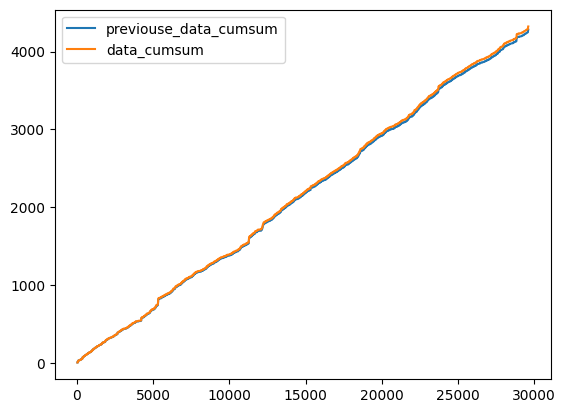

In [19]:
# 누적 그래프 생성
# - 누적값 계산
for_home_graph['previouse_data_cumsum'] = for_home_graph['previouse_data'].cumsum()
for_home_graph['data_cumsum'] = for_home_graph['data'].cumsum()

# - 누적 그래프 생성
import matplotlib.pyplot as plt

plt.plot(for_home_graph['previouse_data_cumsum'], label='previouse_data_cumsum')
plt.plot(for_home_graph['data_cumsum'], label='data_cumsum')
plt.legend()
plt.show()

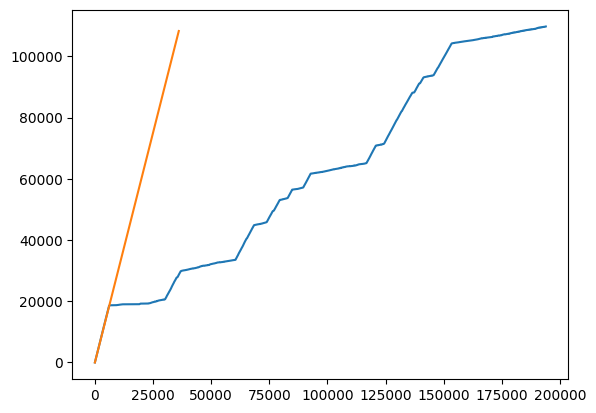

In [22]:
data = pd.read_csv('../JJW/DATA/before_data.csv')
data = data[(data['scale_pv'] > 2) & (data['scale_pv'] < 4)]

plot3 = data['scale_pv'].cumsum()
plot3.plot()
# y=3x 그래프 생성
x = np.arange(0, len(data))
y = 3*x
plt.plot(x, y)
plt.show()

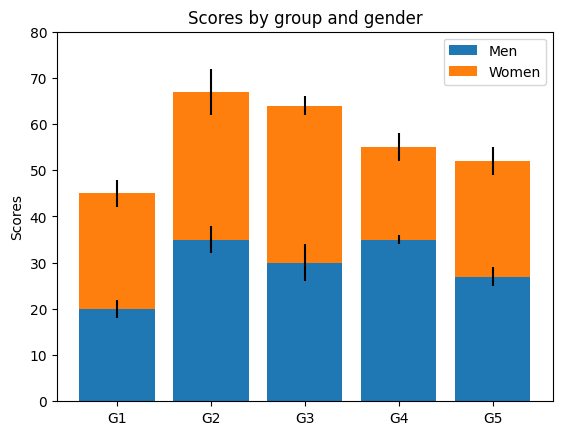

C:\Users\HOME\AppData\Local\Temp\ipykernel_4068\3383788056.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Group', y='Scores', hue='Gender', data=df, ci=None)


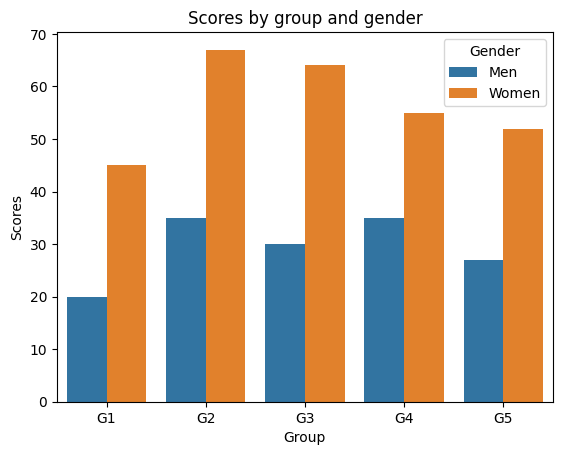

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # x 위치

# 그래프 그리기
p1 = plt.bar(ind, menMeans, yerr=menStd)
p2 = plt.bar(ind, womenMeans, bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 데이터
data = {
    'Group': ['G1', 'G2', 'G3', 'G4', 'G5']*2,
    'Gender': ['Men']*5 + ['Women']*5,
    'Scores': [20, 35, 30, 35, 27, 25, 32, 34, 20, 25]
}
df = pd.DataFrame(data)

# 데이터를 누적 형태로 변환
df = df.sort_values(['Group', 'Gender'])
df['Scores'] = df.groupby(['Group'])['Scores'].cumsum()

# 그래프 그리기
sns.barplot(x='Group', y='Scores', hue='Gender', data=df, ci=None)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.show()

---

## 문제 발생 : k_rpm_pv가 쭉쭉 증가...

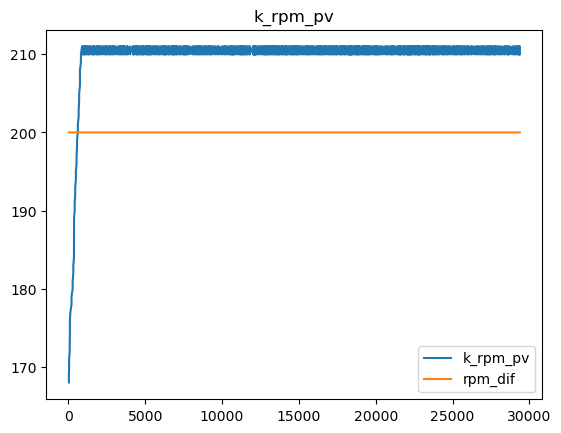

,c_temp_pv,k_rpm_pv,n_temp_pv,s_temp_pv,scale_pv,c_temp_pv_dif,s_temp_pv_dif,n_temp_pv_dif,c_temp_sv,s_temp_sv,n_temp_sv,k_rpm_sv,E_scr_pv,E_scr_sv,scale_dif,rpm_dif,loss
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.0,1395.0,1395.0,1395.0,1395.0,1395.0,1395.000000,1395.0,1395.000000
mean,69.764158,209.837276,67.524875,67.400215,3.077032,0.000143,-0.000932,-0.002366,70.0,70.0,70.0,180.0,8.0,8.0,0.077032,1.0,0.077036
std,0.351782,4.337291,0.914410,1.108196,0.006434,0.098845,0.873879,0.523605,0.0,0.0,0.0,0.0,0.0,0.0,0.006434,0.0,0.006441
min,68.600000,168.000000,66.100000,65.400000,3.064988,-1.100000,-2.800000,-1.400000,70.0,70.0,70.0,180.0,8.0,8.0,0.064988,1.0,0.065000
25%,69.600000,210.000000,66.800000,66.500000,3.072867,0.000000,-0.200000,-0.100000,70.0,70.0,70.0,180.0,8.0,8.0,0.072867,1.0,0.073000
50%,69.700000,210.000000,67.300000,67.300000,3.075615,0.000000,0.000000,0.000000,70.0,70.0,70.0,180.0,8.0,8.0,0.075615,1.0,0.076000
75%,70.000000,211.000000,67.900000,68.200000,3.079204,0.000000,0.200000,0.100000,70.0,70.0,70.0,180.0,8.0,8.0,0.079204,1.0,0.079000
max,70.700000,211.000000,70.600000,71.100000,3.104177,0.600000,5.200000,3.800000,70.0,70.0,70.0,180.0,8.0,8.0,0.104177,1.0,0.104000


In [ ]:
# K_rpm_pv plot
import matplotlib.pyplot as plt

plt.plot(data['k_rpm_pv'])
plt.plot(data['rpm_dif']*200)
plt.title('k_rpm_pv')
plt.legend(['k_rpm_pv', 'rpm_dif'])
plt.show()

data.describe()


### 작업
기본 함수 : 0.05 이상일때 rpm 1 증가, 0.05 미만일때 rpm 1 감소
1. 함수 오류 : 범위 내 일때 0.05 증가토록 되어있었음,, 0으로 수정 => 1000까지 증가하던 게 600으로
2. rpm max 설정 : 210 (실제 데이터 상 최대값은 203) => 210으로 고정, rpm은 계속 상승해야한다 신호줌ㅋ
   1. scale 값은 안정적이다
   2. 하지만 느낌상 이건 scale 모델이 문제라서 그런거 같다 (rpm 영향도 안 받음)

In [ ]:
data.to_csv('../data/result_ver1.csv', index=False)